In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [5]:
df = pd.read_csv('train.csv')

In [6]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [7]:
for col in df.columns:
    print(col, df[col].unique())

battery_power [ 842 1021  563 ... 1139 1467  858]
blue [0 1]
clock_speed [2.2 0.5 2.5 1.2 1.7 0.6 2.9 2.8 2.1 1.  0.9 1.1 2.6 1.4 1.6 2.7 1.3 2.3
 2.  1.8 3.  1.5 1.9 2.4 0.8 0.7]
dual_sim [0 1]
fc [ 1  0  2 13  3  4  5  7 11 12 16  6 15  8  9 10 18 17 14 19]
four_g [0 1]
int_memory [ 7 53 41 10 44 22 24  9 33 17 52 46 13 23 49 19 39 47 38  8 57 51 21  5
 60 61  6 11 50 34 20 27 42 40 64 14 63 43 16 48 12 55 36 30 45 29 58 25
  3 54 15 37 31 32  4 18  2 56 26 35 59 28 62]
m_dep [0.6 0.7 0.9 0.8 0.1 0.5 1.  0.3 0.4 0.2]
mobile_wt [188 136 145 131 141 164 139 187 174  93 182 177 159 198 185 196 121 101
  81 156 199 114 111 132 143  96 200  88 150 107 100 157 160 119  87 152
 166 110 118 162 127 109 102 104 148 180 128 134 144 168 155 165  80 138
 142  90 197 172 116  85 163 178 171 103  83 140 194 146 192 106 135 153
  89  82 130 189 181  99 184 195 108 133 179 147 137 190 176  84  97 124
 183 113  92  95 151 117  94 173 105 115  91 112 123 129 154 191 175  86
  98 125 126 158 170 161 19

In [37]:
num = df[['battery_power','clock_speed','int_memory','mobile_wt','px_height','px_width','ram']]
char = df[['blue','dual_sim','four_g','m_dep','n_cores','pc','sc_h','sc_w','talk_time','three_g','touch_screen','wifi']]
Y = df[['price_range']]
X = df.drop(['price_range'], axis = 1)

In [9]:
num.isnull().sum()

battery_power    0
clock_speed      0
int_memory       0
mobile_wt        0
px_height        0
px_width         0
ram              0
dtype: int64

In [10]:
char.isnull().sum()

blue            0
dual_sim        0
four_g          0
m_dep           0
n_cores         0
pc              0
sc_h            0
sc_w            0
talk_time       0
three_g         0
touch_screen    0
wifi            0
dtype: int64

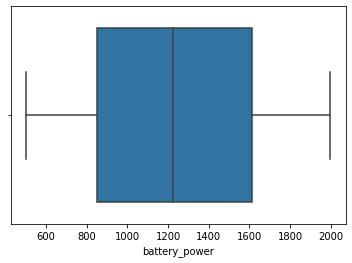

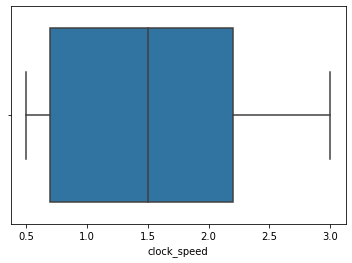

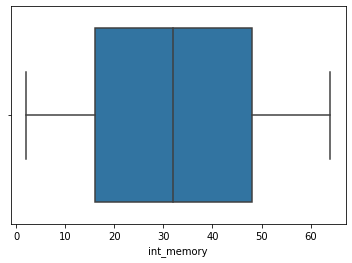

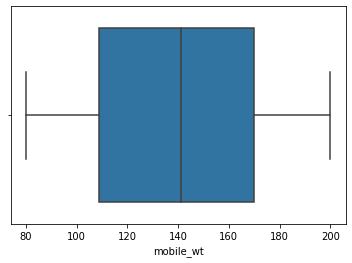

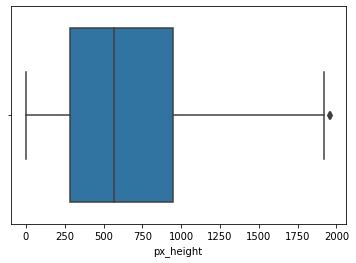

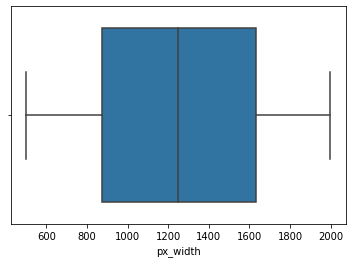

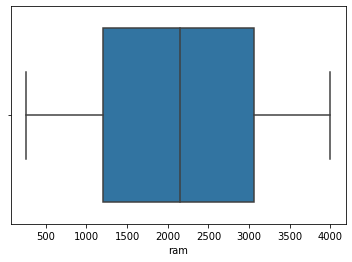

In [11]:
for col in num.columns:
    plt.figure()
    sns.boxplot(num[col])

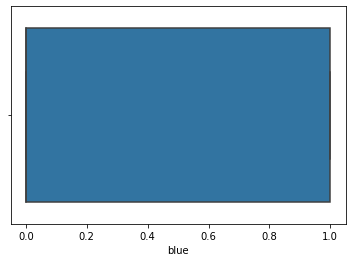

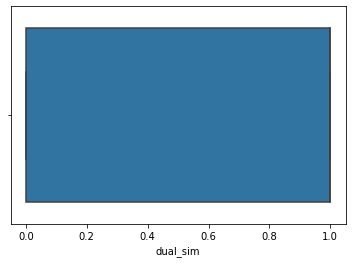

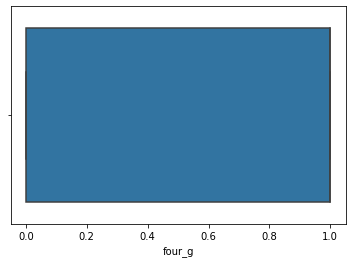

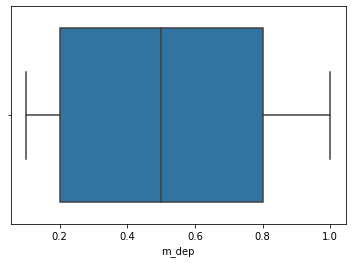

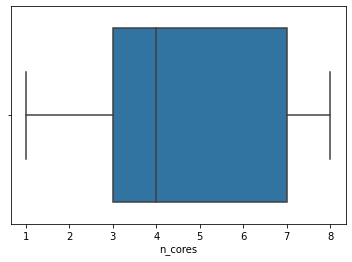

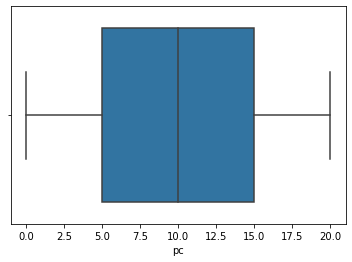

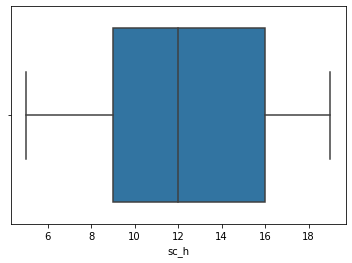

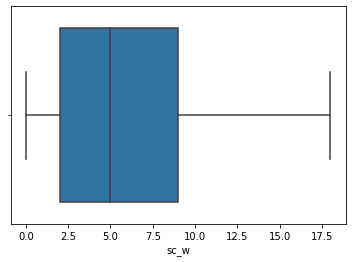

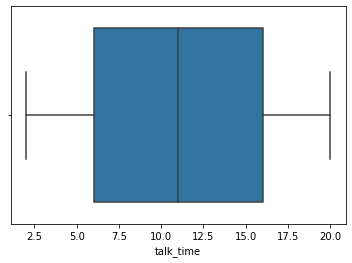

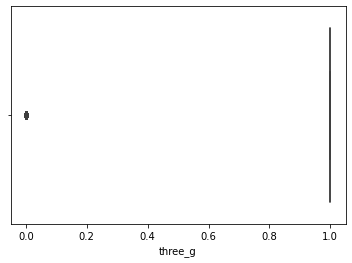

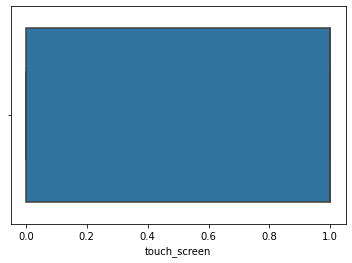

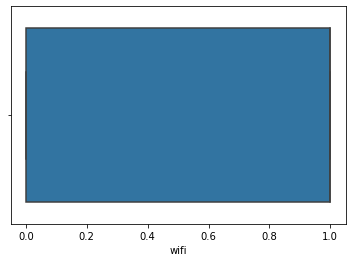

In [12]:
for col in char.columns:
    plt.figure()
    sns.boxplot(char[col])

In [14]:
char['three_g'].value_counts()

1    1523
0     477
Name: three_g, dtype: int64

In [15]:
from sklearn.preprocessing import KBinsDiscretizer
bins = KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')
num_binned = pd.DataFrame(bins.fit_transform(num),columns = num.columns)

In [16]:
num_binned.head()

,battery_power,clock_speed,int_memory,mobile_wt,px_height,px_width,ram
0,2.0,5.0,0.0,8.0,0.0,1.0,6.0
1,3.0,0.0,8.0,4.0,7.0,9.0,6.0
2,0.0,0.0,6.0,5.0,8.0,8.0,6.0
3,0.0,6.0,1.0,4.0,8.0,8.0,6.0
4,8.0,2.0,7.0,5.0,8.0,4.0,3.0


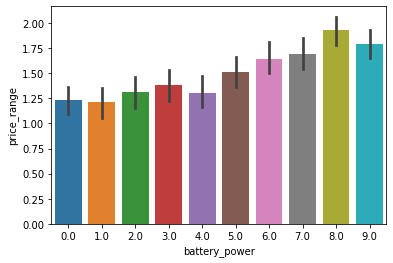

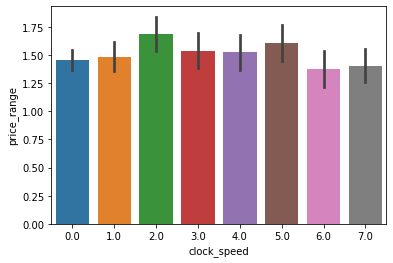

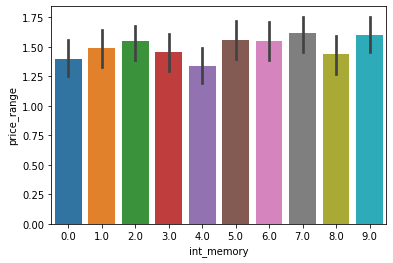

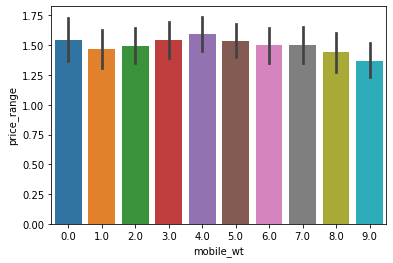

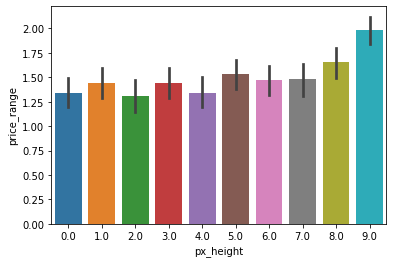

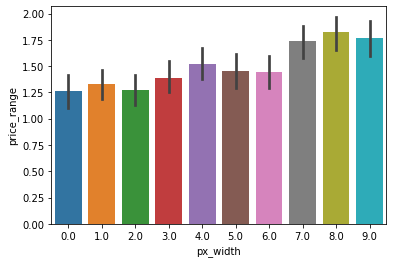

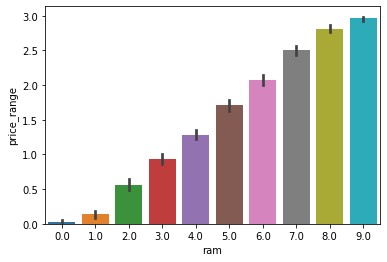

In [18]:
X_num_binned = pd.concat([num_binned,Y], axis = 1)
for col in num_binned.columns:
    plt.figure()
    sns.barplot(x = col, y = "price_range", data = X_num_binned)    

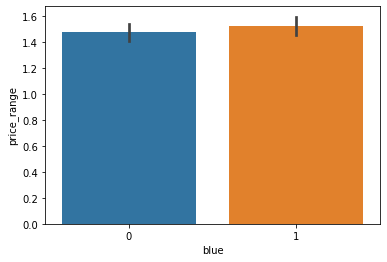

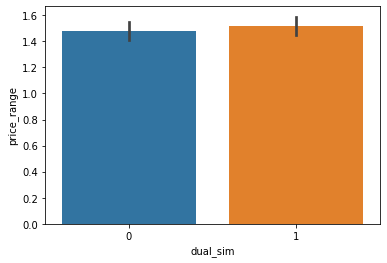

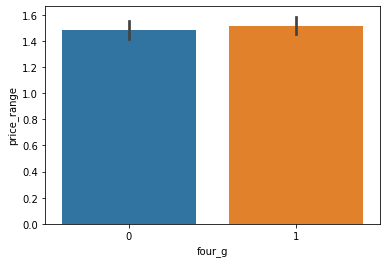

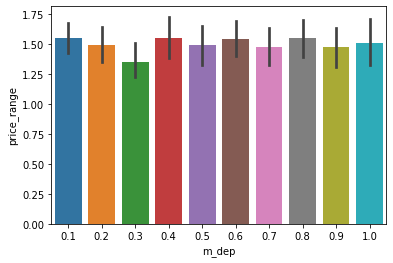

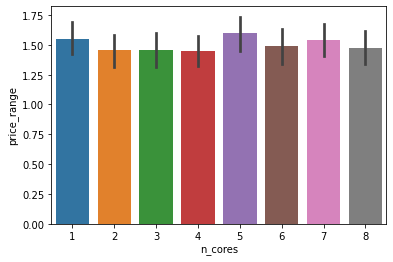

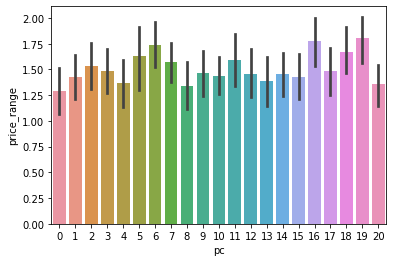

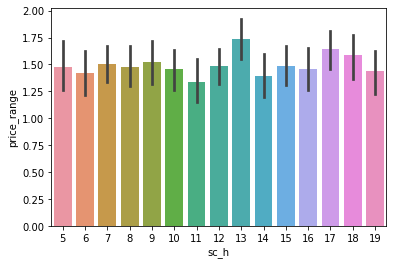

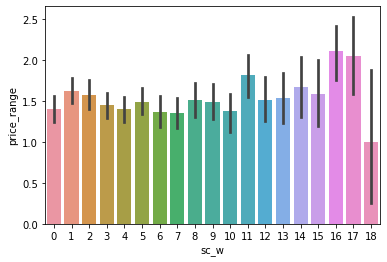

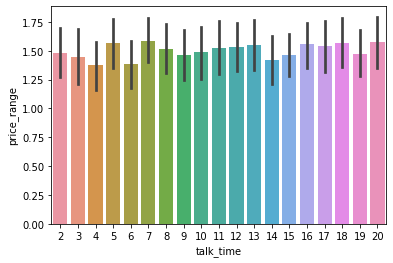

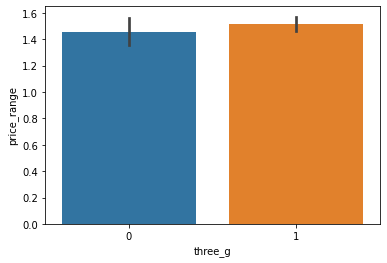

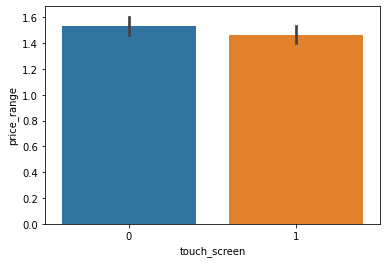

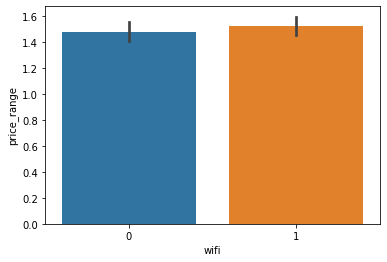

In [19]:
X_char = pd.concat([char,Y], axis = 1)
for col in char.columns:
    plt.figure()
    sns.barplot(x = col, y = "price_range", data = X_char)

In [30]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
f_value_selector = SelectKBest(f_regression,k=4)
f_value_selector.fit_transform(num,Y)
cols = f_value_selector.get_support(indices = True)
num.iloc[:,cols].columns
num_new = num.iloc[:,cols]

In [31]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
selector = SelectKBest(chi2, k=6)
selector.fit_transform(char,Y)
cols = selector.get_support(indices=True)
char.iloc[:,cols].columns
char_new = char.iloc[:,cols]

In [38]:
X_new = pd.concat([num_new,char_new], axis = 1)

In [39]:
X_new.head()

,battery_power,px_height,px_width,ram,n_cores,pc,sc_h,sc_w,talk_time,touch_screen
0,842,20,756,2549,2,2,9,7,19,0
1,1021,905,1988,2631,3,6,17,3,7,1
2,563,1263,1716,2603,5,6,11,2,9,1
3,615,1216,1786,2769,6,9,16,8,11,0
4,1821,1208,1212,1411,2,14,8,2,15,1


In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std = pd.DataFrame(sc.fit_transform(X_new), columns = X_new.columns)

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_std,Y,test_size=0.3,random_state=98)

In [56]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,Y_train)
Y_pred = log_reg.predict(X_test)

In [57]:
print(log_reg.score(X_train,Y_train))
print(log_reg.score(X_test,Y_test))

0.9742857142857143
0.975
